In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lmfit import Model

pl.style.use('seaborn')
pl.rc('font',family='Arial')

In [10]:
train_data = pd.read_csv("SubCh1_TrainingData.csv")
test_data = pd.read_csv("SubCh1_TestData.csv")

In [22]:
train_data.head()

,Sample_Name,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_01.24HR.DHA.BRep1,isolate_01,24HR,DHA,BRep1,0.008286,-0.959492,0.206468,-0.443936,0.453030,...,-0.540993,-3.674097,-1.652979,-2.255490,-4.554757,-0.381422,-1.415857,-4.121011,-2.486528,2.177
1,isolate_01.24HR.DHA.BRep2,isolate_01,24HR,DHA,BRep2,-0.872028,-1.968558,-2.308563,-1.186611,0.508575,...,0.450649,-4.464408,-0.977954,-2.012559,-4.538550,-2.333890,-2.342496,-4.774197,-1.794568,2.177
2,isolate_01.24HR.UT.BRep1,isolate_01,24HR,UT,BRep1,0.039480,-1.291371,-0.946661,-0.538092,-1.778501,...,1.411557,-5.500522,-1.764229,-1.947208,-5.331037,-0.814417,-2.141285,-3.922684,-2.495169,2.177
3,isolate_01.24HR.UT.BRep2,isolate_01,24HR,UT,BRep2,0.125177,-1.462758,-1.888105,-0.828352,-1.410803,...,-0.659519,-5.011207,-0.559471,-2.266763,-5.289318,-2.949869,-2.206432,-4.324299,-1.735312,2.177
4,isolate_01.6HR.DHA.BRep1,isolate_01,6HR,DHA,BRep1,1.354956,-2.139128,-0.541696,-1.481881,-0.735798,...,-1.687048,-4.773306,-0.048847,-2.023727,-4.398358,-3.080500,-0.566545,-4.798190,-0.821690,2.177


In [33]:
genes = list(train_data.columns)
genes[5]

'MAL1.465720.465873.bc..rv..'

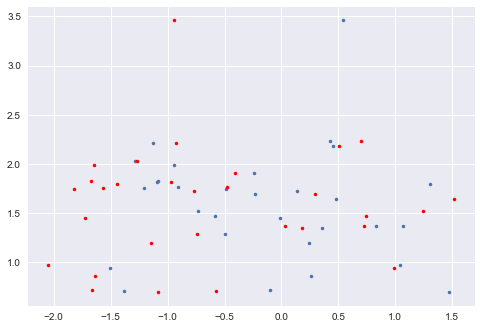

In [40]:
sub1 = train_data[(train_data['Timepoint'] == '24HR') & (train_data['Treatment'] == 'DHA') & (train_data['BioRep'] == 'BRep1')]
sub2 = train_data[(train_data['Timepoint'] == '24HR') & (train_data['Treatment'] == 'DHA') & (train_data['BioRep'] == 'BRep2')]

pl.plot(sub1[genes[9]], sub1['DHA_IC50'],linestyle='none',marker='.')
pl.plot(sub2[genes[9]], sub2['DHA_IC50'],linestyle='none',marker='.',c='r')
pl.show()

In [21]:
X = train_data.drop(['DHA_IC50','Sample_Name','Isolate','Timepoint','Treatment','BioRep'], axis=1)
Y = train_data[['DHA_IC50']]
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.15,random_state=26)
model = RandomForestRegressor(n_estimators=100, max_features=5)
model.fit(X_train, Y_train.values.ravel())

print(model.score(X_train,Y_train))

0.865690035901
